In [1]:
import pandas as pd
from fact.io import read_h5py

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
df_gamma_diff = pd.read_hdf('simulations/gamma-diffuse/south_pointing/20201017_v0.6.3_prod3_local/dl1_gamma-diffuse_south_pointing_20201017_v0.6.3_prod3_local_DL1_training.h5', key='dl1/event/telescope/parameters/LST_LSTCam')
df_gamma = pd.read_hdf('simulations/gamma/south_pointing/20201017_v0.6.3_prod3_local/dl1_gamma_south_pointing_20201017_v0.6.3_prod3_local_DL1_training.h5', key='dl1/event/telescope/parameters/LST_LSTCam')
df_proton = pd.read_hdf('simulations/proton/south_pointing/20201017_v0.6.3_prod3_local/dl1_proton_south_pointing_20201017_v0.6.3_prod3_local_DL1_training.h5', key='dl1/event/telescope/parameters/LST_LSTCam')

In [3]:
max_intensity = 1500
df_gamma_diff_selected = df_gamma_diff.query(f'intensity < {max_intensity}')
df_gamma_selected = df_gamma.query(f'intensity < {max_intensity}')
df_proton_selected = df_proton.query(f'intensity < {max_intensity}')

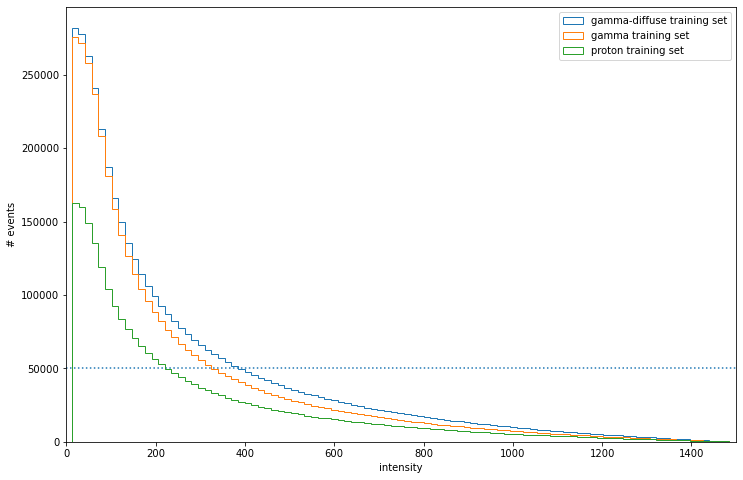

In [4]:
plt.hist(df_gamma_diff_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma-diffuse training set')
plt.hist(df_gamma_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma training set')
plt.hist(df_proton_selected.intensity, bins=100, histtype='step', cumulative=-1, label='proton training set')

plt.hlines(50000, 0, 1500, ls=':')

plt.xlabel('intensity')
plt.ylabel('# events')
plt.xlim(0, max_intensity)
plt.legend()

In [5]:
df_mrk421 = read_h5py('build/dl2_v0.6.1_v05_LST-1.Run02113.h5', key='events')


(array([7.2860e+03, 7.9300e+03, 7.2610e+03, 7.1410e+03, 6.9610e+03,
        7.2490e+03, 8.2740e+03, 9.4990e+03, 1.1172e+04, 1.2759e+04,
        1.4748e+04, 1.6244e+04, 1.7928e+04, 1.9293e+04, 2.0333e+04,
        2.0904e+04, 2.1214e+04, 2.1486e+04, 2.1537e+04, 2.0939e+04,
        2.0013e+04, 1.8972e+04, 1.7792e+04, 1.6096e+04, 1.4631e+04,
        1.3533e+04, 1.2366e+04, 1.1143e+04, 1.0338e+04, 9.2750e+03,
        8.5260e+03, 8.0220e+03, 7.3890e+03, 6.6830e+03, 6.4930e+03,
        6.0210e+03, 5.5650e+03, 5.0800e+03, 4.6510e+03, 4.5070e+03,
        4.1460e+03, 3.9680e+03, 3.7170e+03, 3.5490e+03, 3.2520e+03,
        3.1670e+03, 3.0480e+03, 2.8680e+03, 2.8310e+03, 2.7290e+03,
        2.6220e+03, 2.7090e+03, 2.5100e+03, 2.5410e+03, 2.5180e+03,
        2.4480e+03, 2.4090e+03, 2.4540e+03, 2.3490e+03, 2.4120e+03,
        2.3050e+03, 2.3700e+03, 2.2390e+03, 2.2170e+03, 2.2410e+03,
        2.2360e+03, 2.1810e+03, 2.2710e+03, 2.0720e+03, 2.0750e+03,
        2.0660e+03, 1.9100e+03, 1.9880e+03, 1.80

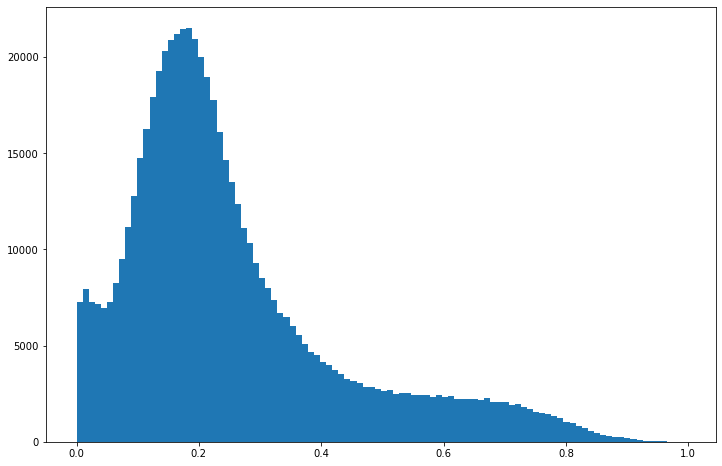

In [6]:
plt.hist(df_mrk421.gammaness, bins=100)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
        -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
        -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.5 , -1.44,
        -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02, -0.96, -0.9 ,
        -0.84, -0.78, -0.72, -0.66, -0.6 , -0.54, -0.48, -0.42, -0.36,
        -0.3 , -0.24, -0.18, -0.12, -0.06,  0.  ,  0.06,  0.12,  0.18,
         0.24,  0.3 ,  0.36,  0.42,  0.48,  0.54,  0.6 ,  0.66,  0.72,
         0.78,  0.84,  0.9 ,  0.96,  1.02,  1.08,  1.14,  1.2 ,  1.26,
         1.32,  1.38,  1.44,  1.5 ,  1.56,  1.62,  1.68,  1.74,  1.8 ,
         1.86,  1.92,  1.98,  2.04,  2.1 ,  2.16,  2.22,  2.28,  2.34,
         2.4 ,  2.46,  2.52,  2.58,  2.64

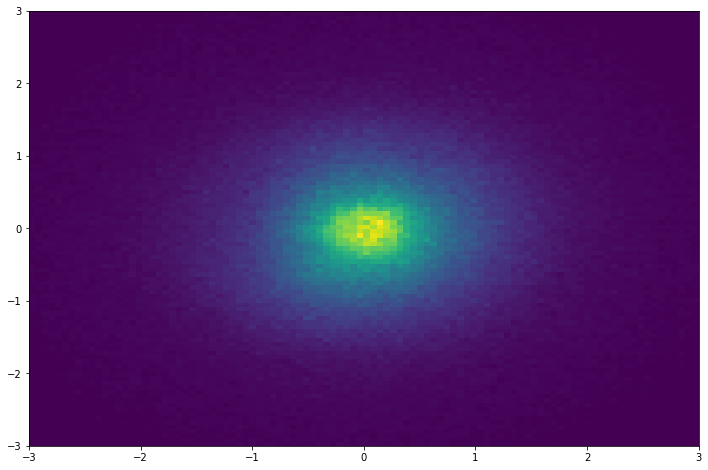

In [7]:
plt.hist2d(df_mrk421.source_x_prediction, df_mrk421.source_y_prediction, bins=100, range=[[-3,3], [-3,3]])